# Grafs, Topologia i Geometria discreta

En aquesta pràctica construirem 

## 1. Preparació

### 1.1 Aconseguir les dades

Aneu al lloc web de 'https://www.nbastuffer.com/2022-2023-nba-player-stats/' i feu clic a "CSV" per descarregar el conjunt de dades.

### 1.2 Preprocessament

Carregueu els mòduls necessaris.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import csv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
np.random.seed(1992)

Llegiu el fitxer csv amb pandas.

In [21]:
df = pd.read_csv("NBA Stats 202223 All Stats  NBA Player Props Tool.csv")

Per inspeccionar les primeres files del conjunt de dades, utilitzeu la comanda head.

In [22]:
df.head(200)

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C-F,29.1,66,34.6,37.0,14.5,771,...,4.2,1.0,1.7,3.4,43.2,37.2,47.4,13.0,124.4,104.1
1,2,Luka Doncic,Dal,F-G,24.1,66,36.2,37.7,14.0,694,...,8.0,1.4,0.5,3.6,41.0,40.4,49.0,14.4,120.0,109.2
2,3,Damian Lillard,Por,G,32.7,58,36.3,33.8,13.7,558,...,7.3,0.9,0.3,3.3,36.9,39.5,44.3,11.5,126.4,117.6
3,4,Shai Gilgeous-Alexander,Okc,G-F,24.7,68,35.5,32.8,12.2,739,...,5.5,1.6,1.0,2.8,36.2,36.9,41.7,10.6,124.9,109.8
4,5,Giannis Antetokounmpo,Mil,F,28.3,63,32.1,38.8,16.2,772,...,5.7,0.8,0.8,3.9,42.9,36.8,48.6,15.9,116.8,100.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Doug McDermott,San,F,31.3,64,20.5,19.2,10.0,70,...,1.4,0.2,0.1,0.9,12.4,11.6,13.8,6.2,112.9,116.6
196,197,Patrick Williams,Chi,F,21.6,82,28.3,15.7,13.0,105,...,1.2,0.9,0.9,1.2,14.1,11.4,15.4,5.2,108.8,110.0
197,198,De'Anthony Melton,Phi,G,24.9,77,27.9,16.5,13.5,87,...,2.6,1.6,0.5,1.3,14.2,12.7,16.8,6.8,111.7,106.0
198,199,Aaron Nesmith,Ind,G-F,23.5,73,24.9,16.8,11.2,142,...,1.3,0.8,0.5,1.0,13.9,11.5,15.2,5.9,111.7,109.0


Per a simplificar el problema, reduim el nombre de classes de la variable que volem predir.

In [23]:
df['POS'] = df['POS'].replace({'C-F': 'C', 'F-G': 'F', 'F-C': 'F', 'G-F': 'G'})

Seleccioneu les variables que utilitzarem per construir el graf k-NN per a la classificació.

In [24]:
X = df[["RPG", "SPG", "BPG", "APG", "2P%", "3P%", "FT%", "TPG"]].values

y = df["POS"].values

Seleccioneu aleatòriament les files que suposem classificades i considereu la resta
de dades com a no classificades.

In [25]:
num_objects_train = 100
n_examples_plot = 100
num_objects_test = X.shape[0] - num_objects_train
random = np.random.choice(X.shape[0], num_objects_train, replace=False)
Index_train = np.isin(range(len(df)), random)
X_train = X[Index_train, :]
y_train = y[Index_train]
X_test = X[np.invert(Index_train),:]
y_test = y[np.invert(Index_train)] 

Seleccioneu les etiquetes d'elements de dades corresponents per a la visualització.

In [26]:
X_train_labels = df["NAME"][Index_train].values
X_test_labels = df["NAME"][np.invert(Index_train)].values

### 1.3 Visualització

Aplicant l'algoritme conegut com a Principal Components Analysis, podem transformar les dades en un espai bidimensional per tal de facilitar la visualització.

In [27]:
# We first should standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [28]:
pca = PCA(n_components = 2)
X_train_embed = pca.fit_transform(X_train_std)
X_test_embed = pca.transform(X_test_std)

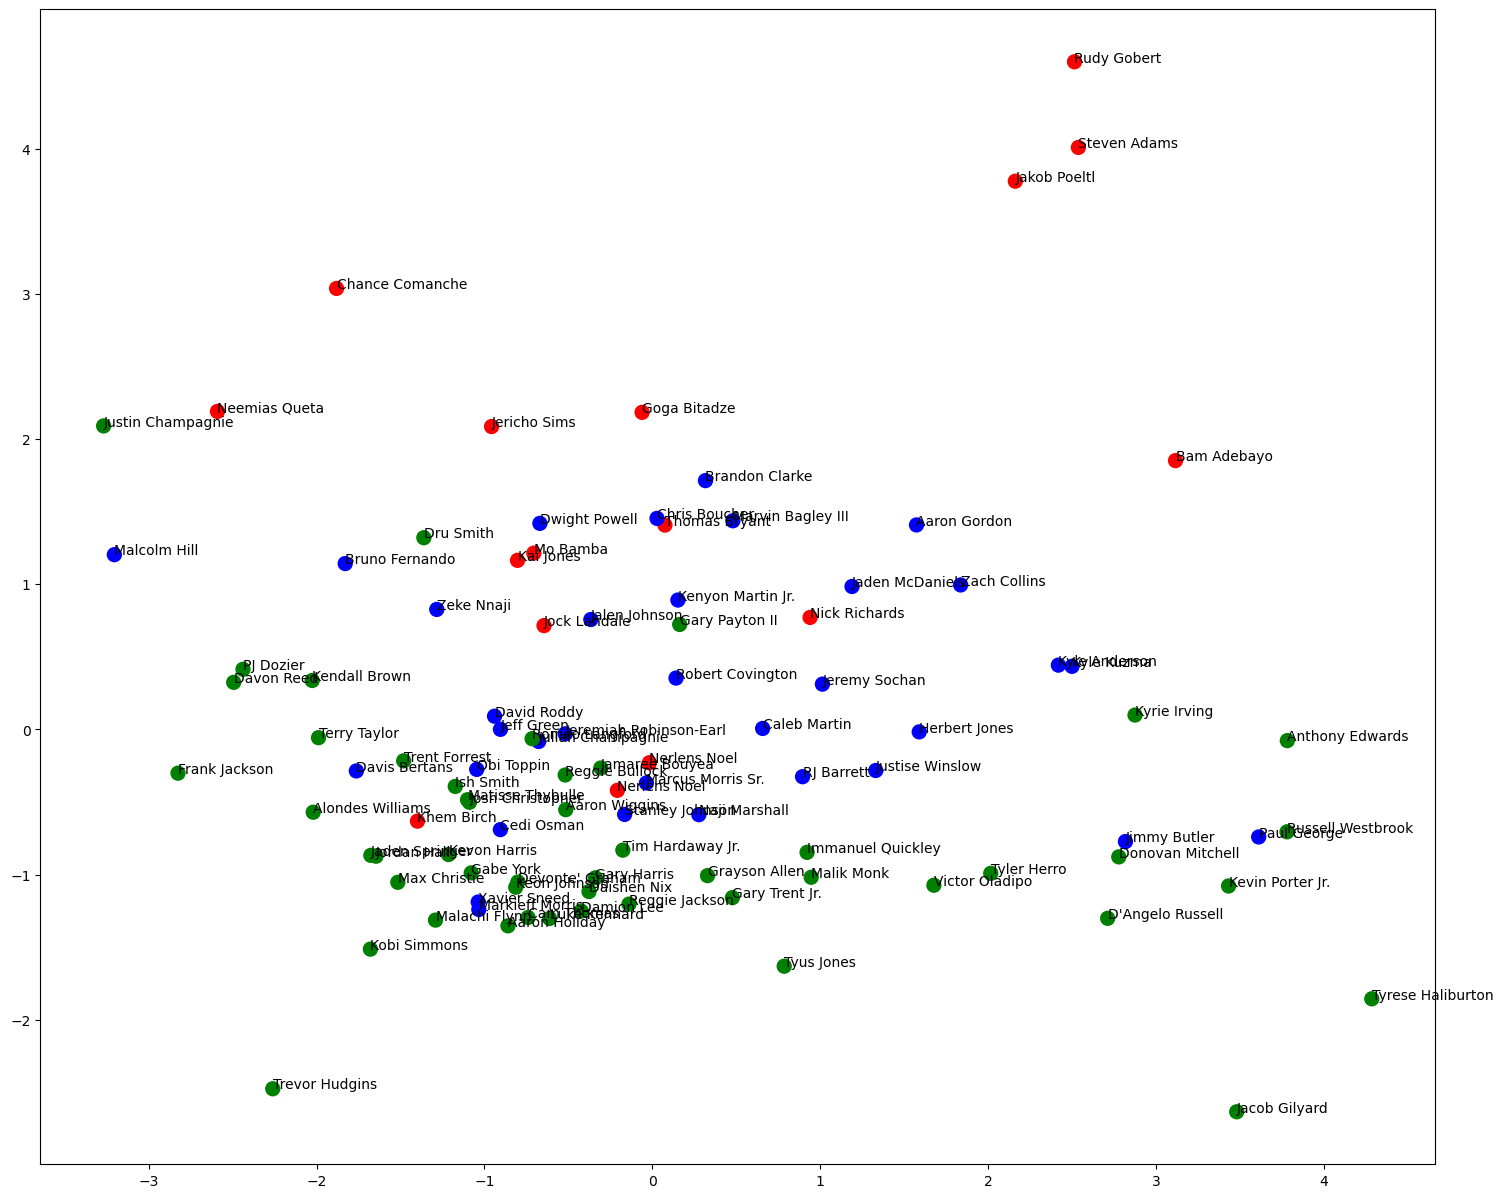

In [29]:
plt.rcParams["figure.figsize"] = (18,15)

colors = {"C": "red", "F": "blue", "G": "green"}
cols = [colors[i] for i in y_train]
plt.scatter(X_train_embed[:n_examples_plot,0], X_train_embed[:n_examples_plot,1] , c=cols[:n_examples_plot], s=100)
for i in range(n_examples_plot):
    txt = X_train_labels[i]
    plt.annotate(txt, (X_train_embed[i,0],X_train_embed[i,1]))
plt.show()

Hauríeu de poder veure el gràfic amb els punts etiquetats del conjunt de dades. Per simplificar només considerem tres categories, el verd corresponent als bases, el vermell corresponent als pívots i els blaus corresponent als alers. 

## 2. Exercisis

### 2.1 Creeu una matriu de distàncies

Utilitzant només la llibreria numpy, creeu una matriu de distàncies entre tots els punts de X_clas.

In [30]:
#print(X_train_embed.shape)
def crear_matriu_distancies():
    shape = int(X_train_embed.shape[0])
    matriu = np.zeros((shape,shape)) #creem una matriu inicialment amb zeros

    for i in range(0, shape): #files
        for j in range(0, shape): #columnes, mateix nombre de files, matriu quadrada
            a = X_train_embed[i] #valor (tupla) del jugador de la fila
            b = X_train_embed[j] #valor (tupla) del jugador de la fila columna
            dist = np.linalg.norm(a-b) #calculem la distància entre les dues tuples (corresponents amb les coordenades x i y del gràfic)
            matriu[i, j] = dist #assignem a l'element de la matriu, la distància corresponent
    #print(matriu.tolist())

    return matriu

matriu_distancies = crear_matriu_distancies()

In [31]:
def save_to_csv(matrix: np.matrix, file_path): #funció adicional per a guardar la matriu com a csv
    matrix_list = matrix.tolist()
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(matrix_list)

#save_to_csv(matriu, "matriu.csv")

### 2.2 Determineu els K-nearest neighbors

Utilitzant la funció argsort de numpy, determineu els índexs dels 3 veïns més propers de cada dada.

In [32]:
def knn(matriu: np.matrix, k : int):

    dic = dict() #inicialitzem un diccionari

    for i in range(0, matriu.shape[0]): #iterem per cada fila
        distancies = matriu[i] #agafa els valors de la fila (jugador) actual, amb les distancies amb cada altre jugador
        i_ordenats = list(np.argsort(distancies)) #la funció np.argsort(llista) retorna un a llista dels índexs ordenats de manera que 
        i_ordenats.remove(i) #elimina a ell mateix (distància = 0)

        #print(f"Índexs més propers per {i}: {i_ordenats[:3]}")

        dic[i] = i_ordenats[:k] #asimint que k=3, retorna els 3 valors és propers (distancia menor) i excloent ell mateix

    return dic

diccionari = knn(matriu_distancies, 3)

### 2.3 Creeu la matriu d'adjacència del mutual K-nn graf

Amb la matriu obtinguda, calculeu la matriu d'adjacència del graf.

In [33]:
shape = int(X_train_embed.shape[0])
matriu_adjacencia = np.zeros((shape,shape)) #creem una matriu inicialment amb zeros. 0 = no connectats. 1 = connectats

diccionari = knn(matriu_distancies, 3) #obtenim el diccionari amb la funció previament creada

for i in range(0, matriu_adjacencia.shape[0]): #iterem per files
    for j in diccionari[i]: #iterem per cada valor (índexs de columnes) del diccionari donat per la key i (la fila actual)
        matriu_adjacencia[i, j] = 1 #posa un 1 per indicar que la fila i la columna tenen una aresta en comú

save_to_csv(matriu_adjacencia, "matriu_adjacencia.csv")

### 2.4 Feu un plot amb el K-NN graf

Utilitzant la llibreria networkx, dibuixeu el gràfic K-NN per a K=3, amb cada node en la posició corresponent dels embeddings emmagatzemats a les dues primeres columnes Xclas, amb els colors corresponents emmagatzemats al vector 'cols' i amb els noms
com a etiquetes. 

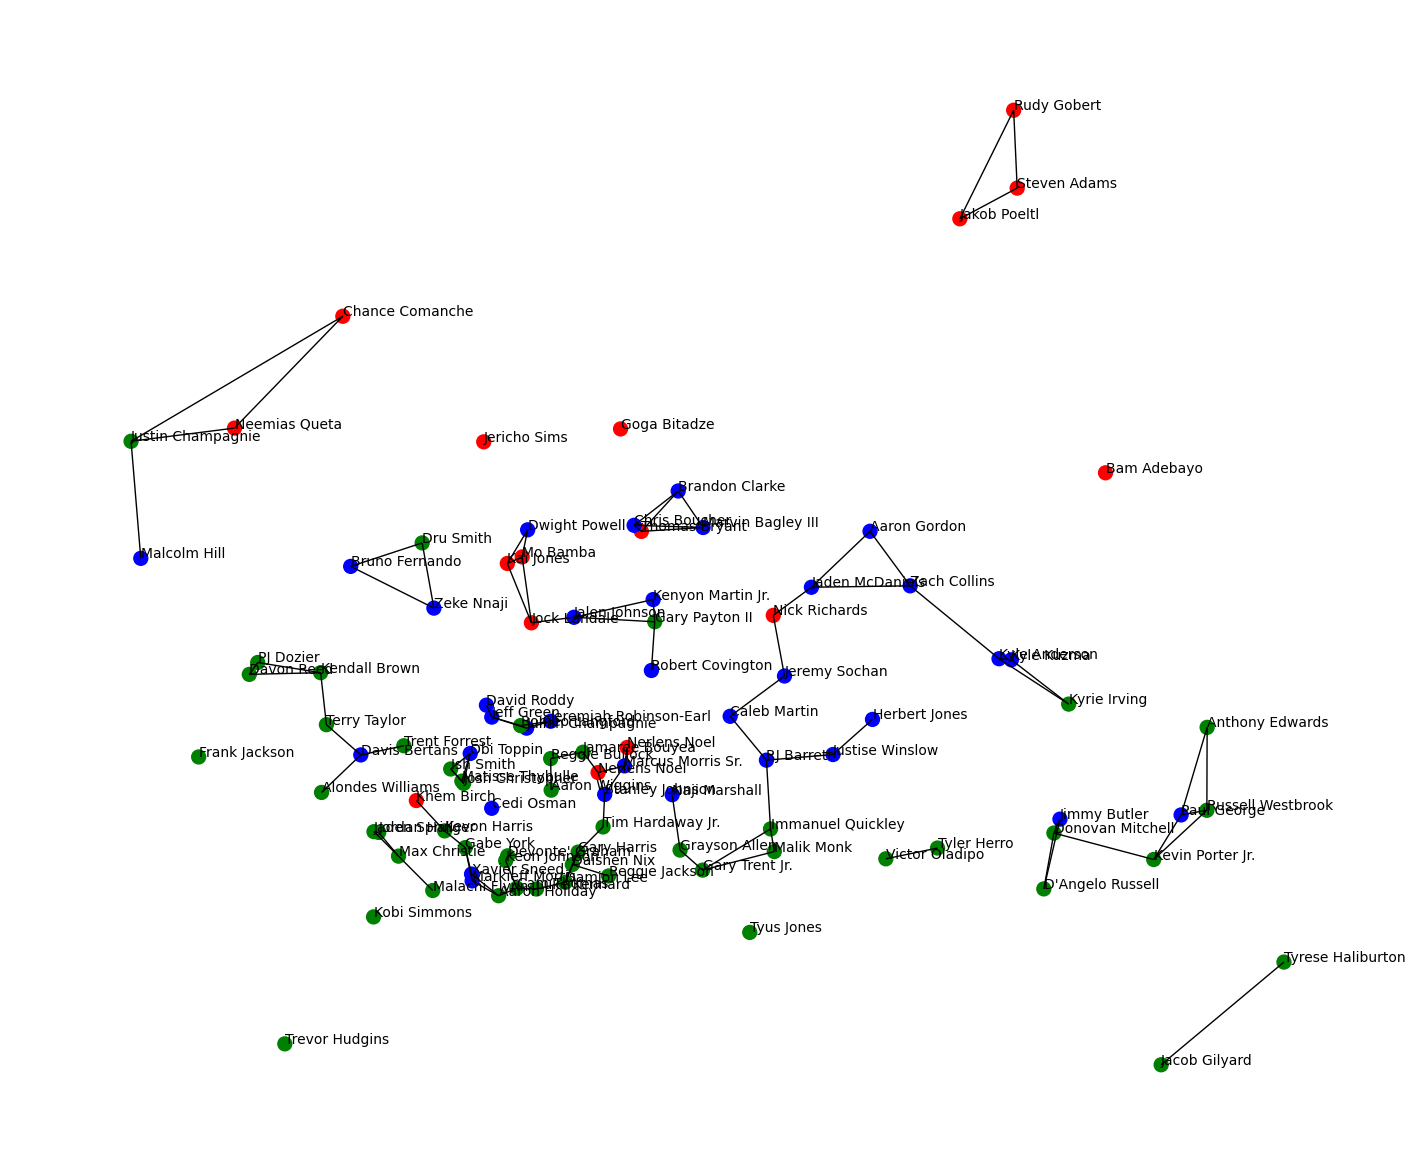

In [34]:
G = nx.Graph() #creem un graf buit
posicions = dict() #creem un diccionari per emmagatzemar les posicions dels nodes

for key, vertex_list in diccionari.items(): #iterem sobre el diccionari
    for vertex in vertex_list: #iterem sobre la llista de vèrtexs
        if key in diccionari[vertex]: #si existeix una connexió entre key i vertex
            G.add_edge(key, vertex) #afegim una aresta al graf

plt.rcParams["figure.figsize"] = (18, 15) #definim la grandària de la figura

colors = {"C": "red", "F": "blue", "G": "green"}
cols = [colors[i] for i in y_train]

#dibuixem els punts en el gràfic amb les seves etiquetes
plt.scatter(X_train_embed[:n_examples_plot, 0], X_train_embed[:n_examples_plot, 1], c=cols[:n_examples_plot], s=100)
for i in range(n_examples_plot):
    txt = X_train_labels[i]
    plt.annotate(txt, (X_train_embed[i, 0], X_train_embed[i, 1]))
    posicions[i] = (X_train_embed[i, 0], X_train_embed[i, 1]) #Emmagatzemem les posicions dels nodes

#dibuixem el graf utilitzant les posicions dels nodes
nx.draw(G, pos=posicions, with_labels=False, node_size=0)
plt.show()

### 2.5 Assigneu una classe a la primera dada del conjunt de test

Calculeu la classe y de la primera dada del conjunt de test. Recordeu que això es fa comptant quina és la classe que més succeeix als K exemples veïns. Comproveu si està correctament classificat.

In [35]:
def knn(matriu: np.matrix, k : int):
    
    """ La funció rep com a paràmetres la matriu de distàncies i k (nombre de veïns que es vol). 
    Retorna un diccionari del tipus (key=index-jugador, value=veïns)."""

    dic = dict()

    for i in range(0, matriu.shape[0]):
        distancies = matriu[i]
        i_ordenats = list(np.argsort(distancies))
        i_ordenats.remove(i) #elimina a ell mateix (distància = 0)

        

        dic[i] = i_ordenats[:k]

    return dic




def class_determination(index : int, diccionari):
    
    """A partir del diccionari (key=index-jugador, value=veïns) retorna la classe del index aportat com a input. 
    Per determinar la classe del jugador s'elabora un diccionari de freqüències i s'agafa la posició més repetida."""
    
    frequency_dic = {"C":0, "F":0, "G":0}
    first_neighbours = diccionari[index]
    
    for value in first_neighbours:
        position = df["POS"][value]
        frequency_dic[position] += 1
        
    result = max(frequency_dic, key=frequency_dic.get)
    
    #print("La predicció del jugador",index,"és",result)
    return result

#MAIN (cas k=3)
diccionari = knn(matriu_distancies,3)
first_data = 0
class_determination(first_data, diccionari)

#l'output és G cosa que no es veritat.


'G'

### 2.6 Feu el mateix per a la resta d'exemples del conjunt de test, i calculeu el percentatge d'encert

In [36]:
def calcul_encert(diccionari):
    
    """La funció agafa com a paràmetre el diccionari del tipus diccionari (key=index-jugador, value=veïns). 
    Retorna el percentatge d'encert total de les prediccions de les classes."""
    
    encerts = 0
    total = 0

    for i in range (0,len(diccionari)):
        result = class_determination(i, diccionari)
        if result == df["POS"][i]:

            encerts += 1
        else:
            pass

        total += 1
    
    return encerts/total*100

#MAIN
percentatge = calcul_encert(diccionari)
print("El percentatge d'encert ha estat d'un",percentatge,"%")

El percentatge d'encert ha estat d'un 47.0 %


### 2.7 Intenteu diferent valors de k = 3,...,10 i feu un plot dels percentatges d'encert

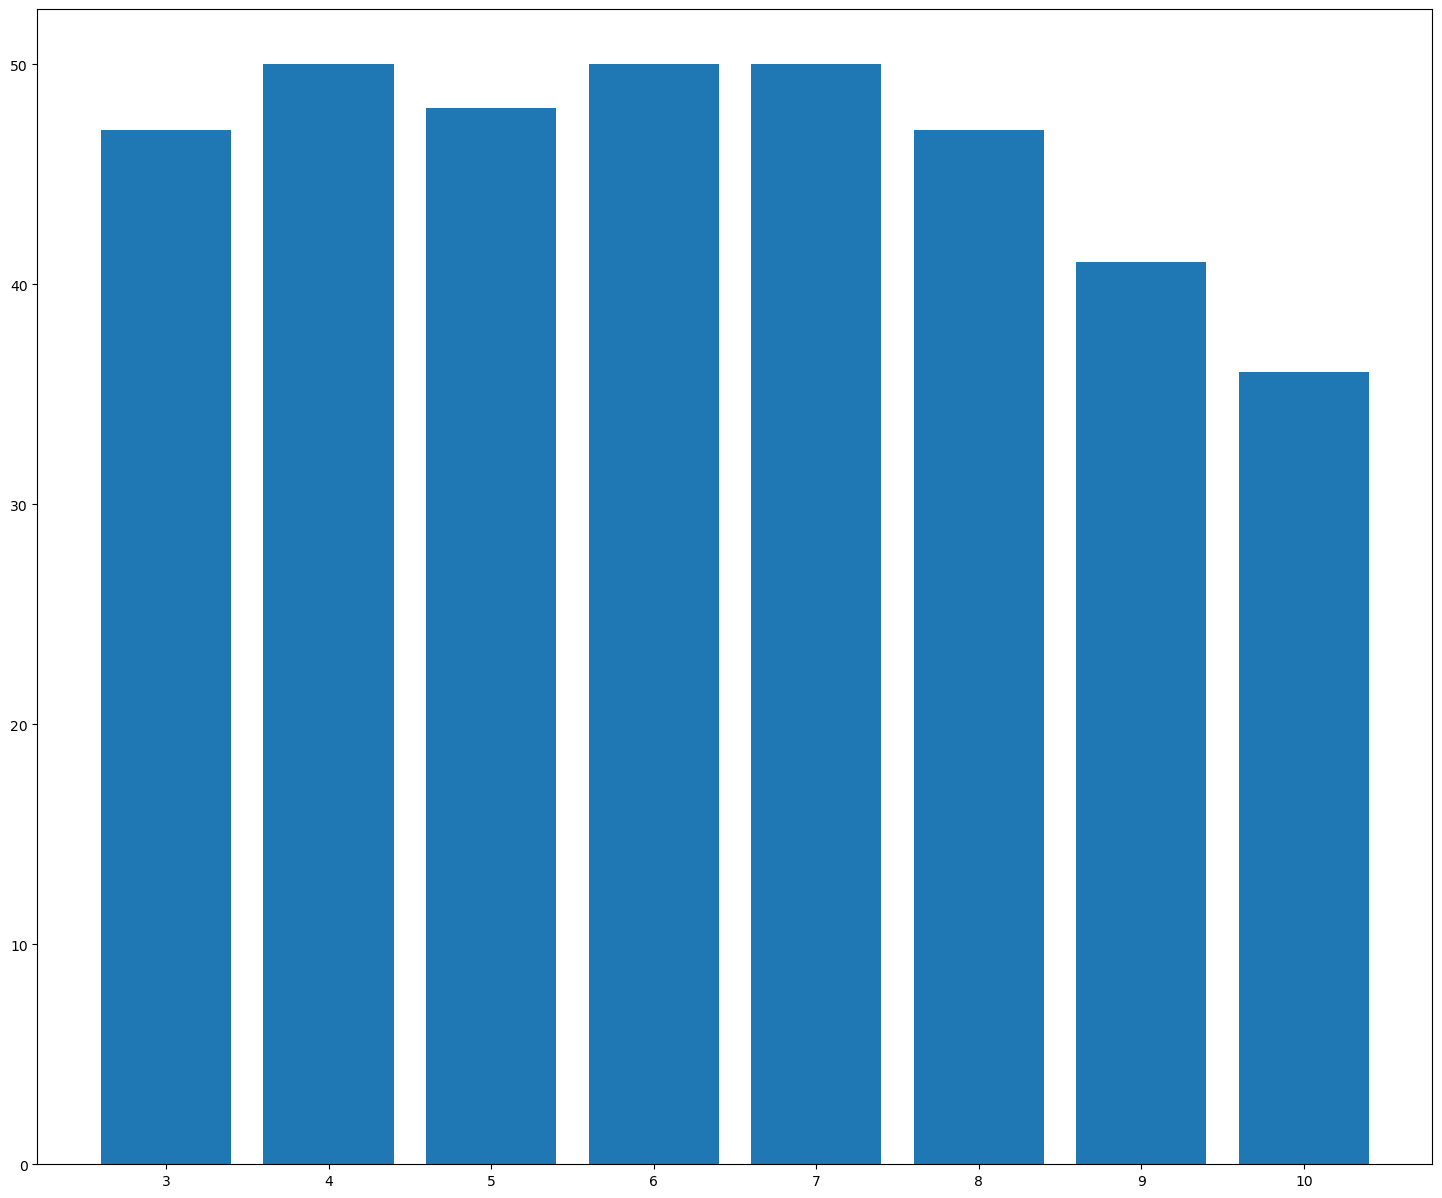

In [38]:
#El programa realitza el càlcul del percentatge d'encert pels diferents valors de k (3,...,10). 
#Mostra un plot de barres verticals on (eix y= %, eix x= valor de k).

llista_percentatges = []
llista_k = []

for k in range (3,11):
    llista_k.append(k)
    dictionary = knn(matriu_distancies,k)
    
    percentatge = calcul_encert(dictionary)
    llista_percentatges.append(percentatge)
    
    
fig, ax = plt.subplots()
ax.bar(llista_k, llista_percentatges)
plt.show()